The notebook Mutations1.ipynb explains the basics of setting up simulations to include random mutations.  

This notebook goes through extracting the data from a simulation and a couple of plots that can be helpful. 

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
from clone_competition_simulation import Parameters, Gene, MutationGenerator, FixedValue

<AxesSubplot:>

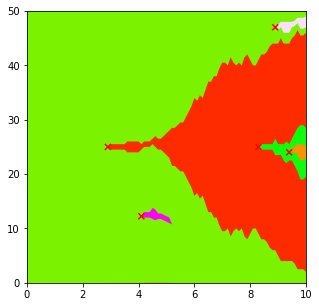

In [7]:
# Setting up a simulation with a few mutations
gene = Gene('Gene1', FixedValue(2), synonymous_proportion=0)
mut_gen = MutationGenerator(genes=[gene])

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_cells=50, mutation_rates=0.01, mutation_generator=mut_gen, 
               print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5))

# In this simulation, the red clone grows large and develops some subclones (green and orange)

In [8]:
# You can see in the parent clone id column that clone 3 is a subclone of clone 1 
# and clone 5 is a subclone of clone 3
s.view_clone_info()

,clone id,label,fitness,generation born,parent clone id,last gene mutated
0,0,0,1,0,-1,None
1,1,0,2,30,0,Gene1
2,2,0,2,42,0,Gene1
3,3,0,4,84,1,Gene1
4,4,0,2,90,0,Gene1
5,5,0,8,95,3,Gene1


# Mutant clone sizes

The population array contains the sizes of each set of unique mutations (and labels if used).  
Each row corresponds to a clone id in s.clones_array (which is shown in s.view_clone_info())

However, if some clones are subclones of others, this array won't truly represent the number of cells
containing each mutant, i.e. the mutant clone sizes. 



In [19]:
# This is the population array for the last 10 time poitns in the simulation. 
# At the end of the simulation (last column) there are 
#   4 wild type cells (clone 0, green in the muller plot)
#   35 cells in clone_id 1, with no further mutations (red)
#   0 cells left  in clone_id 2 (dark pink)
#   7 cells in clone_id 3 (green)
#   2 cells in clone_id 4 (light pink)
#   2 cells in clone_id 5 (orange)  
s.population_array.toarray()[:, -10:]


# However, if we want to know the total cells that contain the mutation that formed clone 1 (red), 
# We need to add the cells in it's subclones (clones 3 and 5)

array([[ 8.,  8.,  8.,  8.,  8.,  7.,  5.,  5.,  5.,  4.],
       [39., 37., 36., 37., 37., 36., 36., 33., 33., 35.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  3.,  4.,  3.,  3.,  5.,  6.,  7.,  7.,  7.],
       [ 1.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  2.,  3.,  3.,  2.]])

In [20]:
# This is what s.get_mutant_clone_sizes does
# This ignores any clones that existed at the start of the simulation
s.get_mutant_clone_sizes()

# This means 44 cells containing the mutant that founded clone_id 1. 
#   35 from clone_id 1 itself, 
#   + 7 from clone_id 3
#   + 2 from clone_id 5

# Note clone_id 3 has 9 cells here, 7 from clone_id 3 itself + 2 from its subclone clone_id 5

array([44,  0,  9,  2,  2])

In [22]:
# You can further filter the clone sizes for non-zero clones only, or for clones from a particular gene, 
# or non-synonymous/synonymous only, or for those with a particular label, 
# or get the sizes at time points other than the end of the simulation
s.get_mutant_clone_sizes(t=9, non_zero_only=True, gene_mutated='Gene1', selection='ns')

array([39,  2,  1])

In [23]:
# To get an np.bincount version of the of mutant clone sizes run
# This function can also be used with arguments to show only mutants in certain genes, at different time points, 
# and for non-synonymous/synonymous only, or for those with a particular label.  
s.get_mutant_clone_size_distribution()

# There is 1 mutant of size 0, 2 of size 2, 1 of size 9, and one of size 44

array([1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

# Clone ancestors/descendants

In [10]:
# The clone lineages are stored in s.tree

# You can also get a list of the clone ancestors 
# Here you can see that clone 5 is descended from 3, then 1, then 0 (the original clone in this simulation) 
# and -1 (the root of the tree, this can be ignored)
s.get_clone_ancestors(5)

[5, 3, 1, 0, -1]

In [12]:
# The descendants of clone 1 are 3 and 5
s.get_clone_descendants(1)

[1, 3, 5]

# Muller plots

These can be very slow to plot for simulations with a lot of clones.   
To reduce the time taken, or to make the plots clearer, you can hide small clones.  

<AxesSubplot:>

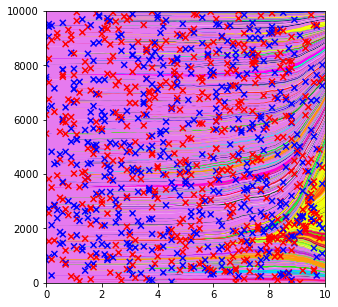

In [29]:
gene = Gene('Gene1', FixedValue(1.5), synonymous_proportion=0.5)
mut_gen = MutationGenerator(genes=[gene])

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_cells=10000, mutation_rates=0.01, mutation_generator=mut_gen, 
               print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5))
# The plot is very busy 

/Users/mh28/miniconda3/envs/competition_jup/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<AxesSubplot:>

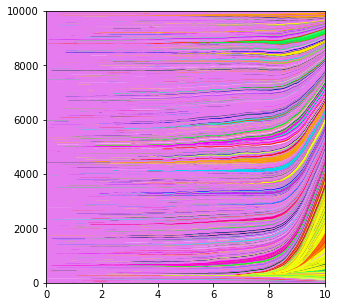

In [30]:
# The Xs can be hidden
s.muller_plot(figsize=(5, 5), show_mutations_with_x=False)

<AxesSubplot:>

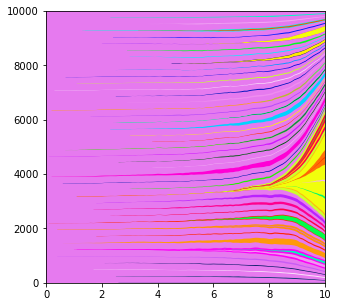

In [33]:
# And you can only show clones which reach a size of at least 30 cells
s.muller_plot(figsize=(5, 5), show_mutations_with_x=False, min_size=30)

# Incomplete moments

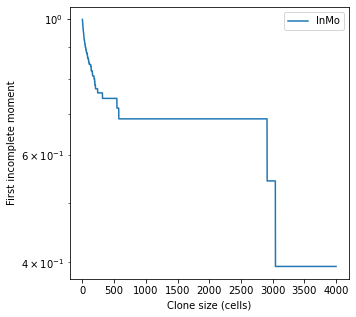

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
s.plot_incomplete_moment(ax=ax)

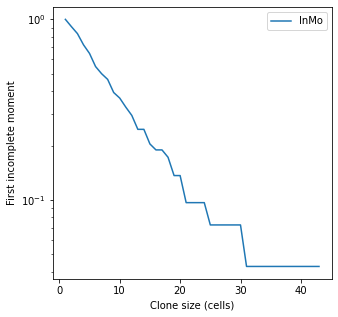

In [39]:
# And a neutral simulation
gene = Gene('Gene1', FixedValue(1), synonymous_proportion=0.5)
mut_gen = MutationGenerator(genes=[gene])

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_cells=10000, mutation_rates=0.01, mutation_generator=mut_gen, 
               print_warnings=False)
s = p.get_simulator()
s.run_sim()

fig, ax = plt.subplots(figsize=(5, 5))
s.plot_incomplete_moment(ax=ax)